In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data_frame = pd.read_csv("../data/final/final_sampled.csv")
data_frame.head()

,payload,category
0,http:3H6k7lIAiqjfNeN@00330.00072.0000326.00000316,openredirect
1,/https:///www.google.com/%2f%2e%2e,openredirect
2,15365381r,clean
3,/https://example.com/%2e%2e,openredirect
4,<input2 onpointerdown=alert(1)>XSS</input2>,xss


In [3]:
data_frame.isnull().any()

payload      True
category    False
dtype: bool

In [4]:
data_frame.dropna(inplace=True)
data_frame.isnull().sum()

payload     0
category    0
dtype: int64

In [16]:
total_data = data_frame["payload"].count()

total_injection = data_frame["category"].where(data_frame["category"]=="injection").count()
total_ldf_lfi = data_frame["category"].where(data_frame["category"]=="lfi-ldf").count()
total_rce = data_frame["category"].where(data_frame["category"]=="rce").count()
total_openredirect = data_frame["category"].where(data_frame["category"]=="openredirect").count()
total_xss = data_frame["category"].where(data_frame["category"]=="xss").count()
total_xxe = data_frame["category"].where(data_frame["category"]=="xxe").count()
total_deserialize = data_frame["category"].where(data_frame["category"]=="deserialize").count()
total_crlf = data_frame["category"].where(data_frame["category"]=="crlf").count()

total_malicious = total_xxe + total_xss + total_crlf + total_openredirect + total_injection + total_rce + total_injection + total_ldf_lfi
total_clean = data_frame["category"].where(data_frame["category"]=="clean").count()

#data_frame["category"].unique()
sizes = []
sizes.append([total_clean, total_ldf_lfi , total_xss , total_injection , total_rce ,  total_openredirect , total_crlf , total_xxe ,total_deserialize])

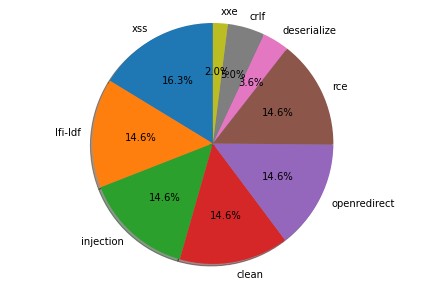

In [17]:
lables = data_frame["category"].unique().tolist()

_, cat_dis = plt.subplots()
cat_dis.pie(sizes[0],  labels=lables, autopct='%1.1f%%',
        shadow=True, radius=1.2, startangle=90)
cat_dis.axis('equal')

plt.tight_layout()
plt.show()

In [160]:
data_frame.sample(n=10)

,payload,category
137421,cm.,clean
115282,pion,clean
8554,Mattson,clean
81691,%c0%5e%c0%5e0x2f%c0%5e%c0%5e0x2fetc0x2fpasswd,lfi-ldf
137179,reliability,clean
140363,0x2e0x2e%c1%pc0x2e0x2e%c1%pc0x2e0x2e%c1%pc0x2e...,lfi-ldf
134518,obsolescence,clean
101819,%252e%252e/%252e%252e/%252e%252e/etc/passwd,lfi-ldf
38533,%fc%80%80%80%80%ae%fc%80%80%80%80%ae\%fc%80%80...,lfi-ldf
99997,bombs,clean


In [161]:
data_frame.sample(n=10)

,payload,category
76712,which netcat,rce
65768,Tiny,clean
58265,40240,clean
101051,eitttxdesslsex=2c4b5l&samaily=7632669&sbnullxa...,clean
585,/%252e%252e%255c%252e%252e%255c%252e%252e%255c...,lfi-ldf
36454,1%';select case when 7717=7717 then 1 else nul...,injection
91075,3020134133888315,clean
55821,"make_set(8734=8734,sleep(5))",injection
133188,.../.0x5c.../.0x5c.../.0x5c.../.0x5c.../.0x5ce...,lfi-ldf
138071,hbvhrdq=894838&tzememl=610585&gsoia=ti9dwuy3yb...,lfi-ldf


In [162]:
data_frame.sample(n=10)

,payload,category
11019,"iwgetxv4=216&7oeduea2cpns=|echo "" content-type...",rce
44238,%%32%%65%%32%%650x5c%%32%%65%%32%%650x5c%%32%%...,lfi-ldf
108034,Teruel,clean
57366,<basefont id=x tabindex=1 ondeactivate=print()...,xss
14372,"<a2 onmousedown=""alert(1)"">test</a2>",xss
140605,.%2e%c0%5c.%2e%c0%5c.%2e%c0%5c.%2e%c0%5c.%2e%c...,lfi-ldf
142643,/lr@ahlh9f1/hftuziaf6ajs43/shankmhvoo.aspx,clean
125146,1%'))) or 2367=(select count(*) from rdb$field...,injection
75335,Adonay,clean
27936,init,clean


In [19]:
payload_lengths = []
def get_payload_length(s):
        payload_lengths.append(len(s))
        return s


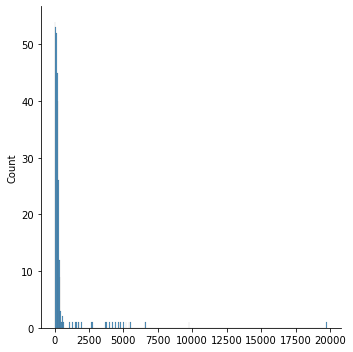

In [20]:
#plot length distribution
data_frame["payload"].apply(get_payload_length)
payload_lengths = list(set(payload_lengths))

sns.displot(payload_lengths)

In [211]:
#max_payload_length
max(payload_lengths)


19788